In [1]:
import pandas as pd
from pandas import DataFrame


In [2]:
import pandas as pd
import re
import os

# define a function to parse each log entry
def parse_log_entry(log_entry):
    # define a regular expression pattern to extract information from the log entry
    pattern = r'(?P<server_name>[\w.-]+) (?P<remote_host>\S+) (?P<remote_logname>\S+) (?P<remote_user>\S+) \[(?P<timestamp>[^\]]+)\] "(?P<request_method>[A-Z]+) (?P<requested_url>\S+) HTTP/\d\.\d" (?P<status_code>\d+) (?P<bytes_sent>\d+) "(?P<referer>[^"]+)" "(?P<user_agent>[^"]+)"'
    
    # match the pattern against the log entry
    match = re.match(pattern, log_entry)
    
    if match:
        return match.groupdict()
    else:
        return None


logs_directory = "logs"

# list all files in the directory
log_files = [f for f in os.listdir(logs_directory) if os.path.isfile(os.path.join(logs_directory, f))]

# list to store parsed log entries
all_log_entries = []

# process each log file
for log_file in log_files:
    log_file_path = os.path.join(logs_directory, log_file)
    
    # read log file line by line and parse each entry
    with open(log_file_path, 'r') as file:
        for line in file:
            log_entry = parse_log_entry(line.strip())
            if log_entry:
                all_log_entries.append(log_entry)

# convert list of dictionaries to DataFrame
df = pd.DataFrame(all_log_entries)

# display the DataFrame
print(df.head(10))  # Displaying the first 10 rows of the combined DataFrame

             server_name   remote_host remote_logname remote_user  \
0      sitgesanytime.com   47.76.35.19              -           -   
1  www.sitgesanytime.com   47.76.35.19              -           -   
2  www.sitgesanytime.com  40.77.167.53              -           -   
3      sitgesanytime.com   47.76.35.19              -           -   
4  www.sitgesanytime.com   47.76.35.19              -           -   
5      sitgesanytime.com   47.76.35.19              -           -   
6  www.sitgesanytime.com   47.76.35.19              -           -   
7      sitgesanytime.com   47.76.35.19              -           -   
8  www.sitgesanytime.com   47.76.35.19              -           -   
9      sitgesanytime.com   47.76.35.19              -           -   

                    timestamp request_method  \
0  22/Jan/2024:00:00:00 +0100           HEAD   
1  22/Jan/2024:00:00:01 +0100           HEAD   
2  22/Jan/2024:00:00:06 +0100            GET   
3  22/Jan/2024:00:00:06 +0100           HEAD   


In [3]:
df['request_method']

0          HEAD
1          HEAD
2           GET
3          HEAD
4          HEAD
           ... 
1076917     GET
1076918     GET
1076919     GET
1076920     GET
1076921     GET
Name: request_method, Length: 1076922, dtype: object

In [4]:
print(df['requested_url'])

print(df['status_code'])

print(df['bytes_sent'])


0          /fr/pag492/explora-platges-i-ports-2/id12/les-...
1          /fr/pag492/explora-platges-i-ports-2/id12/les-...
2          /ca/noticias/84/sitges-obt%C3%A9-el-certificat...
3          /fr/pag492/explora-platges-i-ports-2/id12/les-...
4          /fr/pag492/explora-platges-i-ports-2/id12/les-...
                                 ...                        
1076917    /plantilles/turisme/eltemps/wstemps.php?site=1...
1076918                /plantilles/turisme/img/temps3/31.svg
1076919                                                    /
1076920                                                 /en/
1076921     /plantilles/turisme/css/estils-capcalera.css?v=3
Name: requested_url, Length: 1076922, dtype: object
0          301
1          200
2          404
3          301
4          200
          ... 
1076917    200
1076918    200
1076919    301
1076920    200
1076921    200
Name: status_code, Length: 1076922, dtype: object
0           4840
1           5223
2           2509
3          

In [5]:
# save the DataFrame to a CSV file
csv_file_path = "../combined_logs.csv"
df.to_csv(csv_file_path, index=False)

print(f"CSV file saved successfully: {csv_file_path}")

CSV file saved successfully: ../combined_logs.csv


In [7]:
print(df['user_agent'][0])

Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3928.157 Safari/537.36


### Variables insights
* server_name is **not** important for training the models **(not done)**
* remote_host is important and has been split into octets and normalized **(done)**
* remote_logname is **not** important for training the models **(not done)**
* remote_user **may** be important, we just have to consider that there's "-" values that need to be handled **(not done)**
* timestamp is important and has been split into hour, second, day, and cyclic encoding for training NN (sine, cosine) **(done)**
* request_method is important and it has been one-hot encoded, not label because model may learn that there's an order between things **(done)**
* requested_url is important and it has been vectorized using word embeddings with dimensionality 300 **(done)**
* status_code is important and we need to one hot encode (possibly) the feature and analyze its unique values **(not done)**
* bytes_sent **may** be important but we also need to take into account that its value is properly normalized within a range **(not done)**
* referer and user_agent are both important and need to be analyzed (possibly embeddings to vectorize) **(not done)**

In [8]:
unique_values = df['remote_user'].unique()
for value in unique_values:
    print(value)

-


* As we can see, the only value is "-", so we will drop the column

In [9]:
unique_values = df['user_agent'].unique()
for value in unique_values:
    print(value)

Se han truncado las últimas 5000 líneas del flujo de salida.
Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.2713.15 Safari/537.36
Mozilla/5.0 (Windows NT 6.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.2031.98 Safari/537.36
Mozilla/5.0 (Windows NT 6.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.2985.100 Safari/537.36
Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3171.7 Safari/537.36
Mozilla/5.0 (Windows NT 6.2; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/76.0.2655.21 Safari/537.36
Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/65.0.2877.121 Safari/537.36
Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3364.6 Safari/537.36
Mozilla/5.0 (Windows NT 6.2; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3577.140 Safari/537.36
Mozilla/5.0 (Windows NT

In [10]:
import nltk
import re
import sqlite3
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from string import punctuation
from keras.preprocessing import text
from urllib.parse import unquote
from nltk.tokenize import word_tokenize
from nltk.corpus import PlaintextCorpusReader
from gensim.models import Word2Vec
import multiprocessing
physical_devices = tf.config.list_physical_devices('GPU')
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [11]:
def preprocess_useragent(user_agent):
    user_agent = re.sub(r'[/.\-(),;:]', ' ', user_agent)
    tokens = word_tokenize(user_agent)
    return tokens

agent_tokens = []
chunk_size = 10000
for agent in unique_values:
    tokens = preprocess_useragent(agent)
    agent_tokens.append(tokens)



print("Corpus created successfully.")

Corpus created successfully.


In [12]:
print(agent_tokens[:5])

[['Mozilla', '5', '0', 'Windows', 'NT', '10', '0', 'Win64', 'x64', 'AppleWebKit', '537', '36', 'KHTML', 'like', 'Gecko', 'Chrome', '61', '0', '3928', '157', 'Safari', '537', '36'], ['Mozilla', '5', '0', 'AppleWebKit', '537', '36', 'KHTML', 'like', 'Gecko', 'compatible', 'bingbot', '2', '0', '+http', 'www', 'bing', 'com', 'bingbot', 'htm', 'Chrome', '116', '0', '1938', '76', 'Safari', '537', '36'], ['Mozilla', '5', '0', 'Windows', 'NT', '6', '1', 'Win64', 'x64', 'AppleWebKit', '537', '36', 'KHTML', 'like', 'Gecko', 'Chrome', '66', '0', '2755', '92', 'Safari', '537', '36'], ['Mozilla', '5', '0', 'Windows', 'NT', '6', '3', 'Win64', 'x64', 'AppleWebKit', '537', '36', 'KHTML', 'like', 'Gecko', 'Chrome', '64', '0', '2188', '146', 'Safari', '537', '36'], ['Mozilla', '5', '0', 'Windows', 'NT', '10', '0', 'Win64', 'x64', 'AppleWebKit', '537', '36', 'KHTML', 'like', 'Gecko', 'Chrome', '74', '0', '3180', '174', 'Safari', '537', '36']]


In [13]:
EMB_DIM = 300

w2v = Word2Vec(sentences=agent_tokens, vector_size=EMB_DIM, window=5, min_count=5, negative=15,
               epochs=10, workers=multiprocessing.cpu_count())

In [14]:
word_vectors = w2v.wv
result = word_vectors.similar_by_word("Windows")
print("Most similar to 'Windows':\n", result[:3])

result = word_vectors.similar_by_word("Linux")
print("Most similar to 'Linux':\n", result[:3])

result = word_vectors.similar_by_word("Macintosh")
print("Most similar to 'Macintosh':\n", result[:3])

Most similar to 'Windows':
 [('Mozilla', 0.7524935603141785), ('5', 0.7205000519752502), ('NT', 0.6683083772659302)]
Most similar to 'Linux':
 [('CrOS', 0.7249941825866699), ('11', 0.6562584638595581), ('14541', 0.6415650248527527)]
Most similar to 'Macintosh':
 [('Intel', 0.9636563062667847), ('PPC', 0.8181185126304626), ('OS', 0.7886443734169006)]


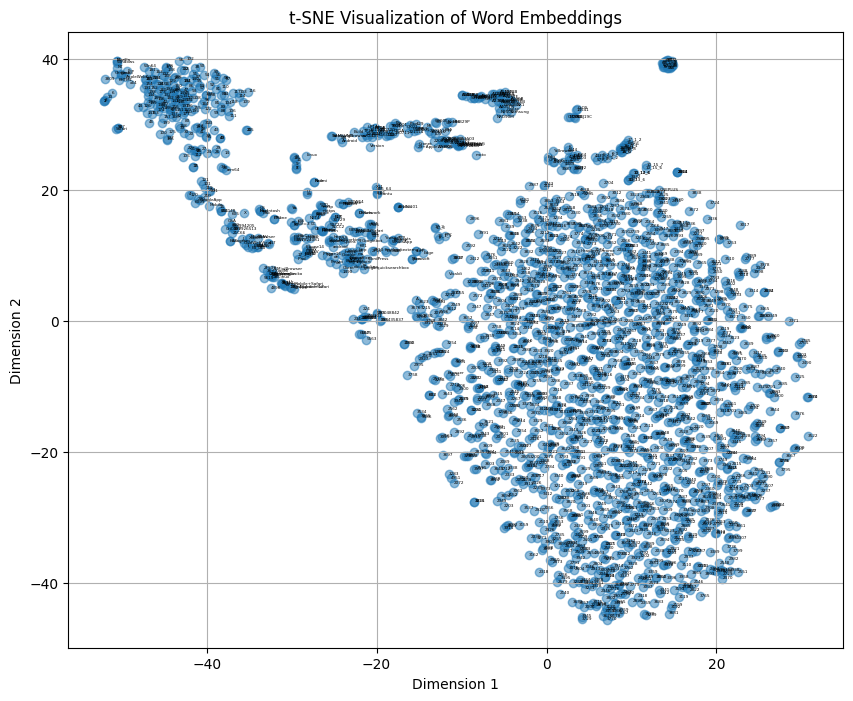

In [15]:
# get the vocabulary
vocab = list(word_vectors.key_to_index.keys())

# get the word vectors
word_vecs = [word_vectors[word] for word in vocab]

# convert word_vecs to a numpy array
word_vecs_np = np.array(word_vecs)

# use t-SNE to reduce dimensionality to 2D
tsne = TSNE(n_components=2, random_state=42)
word_vecs_2d = tsne.fit_transform(word_vecs_np)

# plot
plt.figure(figsize=(10, 8))
plt.scatter(word_vecs_2d[:, 0], word_vecs_2d[:, 1], alpha=0.5)

# annotate points with words
for word, (x, y) in zip(vocab, word_vecs_2d):
    plt.annotate(word, (x, y), size=3)

plt.title('t-SNE Visualization of Word Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.show()

## **DATA VISUALIZATION**

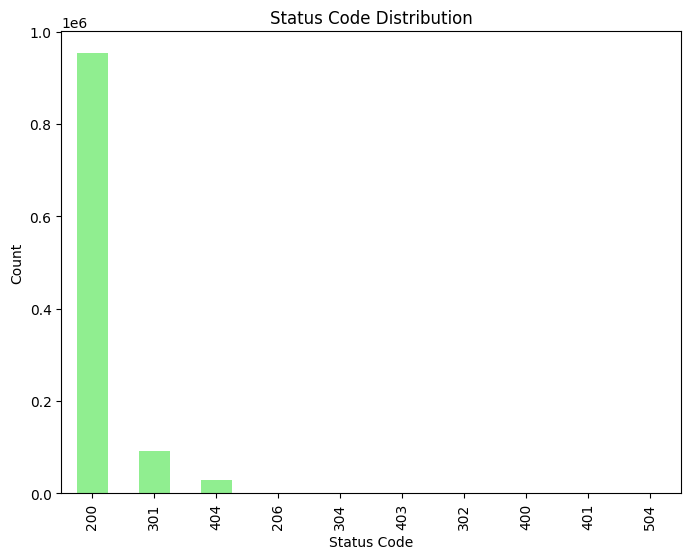

In [16]:
# Status Code Distribution
plt.figure(figsize=(8, 6))
df['status_code'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Status Code Distribution')
plt.xlabel('Status Code')
plt.ylabel('Count')
plt.show()


The "Status Code Distribution" plot shows the distribution of HTTP status codes in your dataset.

HTTP status codes are standard response codes given by web servers on the internet. They inform the client about the status of their request. Each status code is a three-digit number, and they can be grouped into different categories:

* 1xx (Informational): These are provisional responses indicating that the server received the request but has not yet completed the request processing.
* 2xx (Success): These indicate that the request was received, understood, and accepted successfully.
* 3xx (Redirection): These indicate that further action needs to be taken by the client to complete the request.
* *4xx (Client Error): These indicate that the client has made an error in the request, such as requesting a page that doesn't exist (404 Not Found) or unauthorized access (401 Unauthorized).
5xx (Server Error): These indicate that the server encountered an error while trying to process the request, such as a server overload (503 Service Unavailable) or a server misconfiguration.

In the "Status Code Distribution" plot, each bar represents a different status code, and the height of the bar represents the count of occurrences of that status code in your dataset. This visualization helps you understand the distribution of server responses, which can be useful for identifying patterns or anomalies in your web traffic. For example, a high frequency of 4xx status codes might indicate client-side issues or attempted attacks, while a high frequency of 5xx status codes might indicate server-side issues.

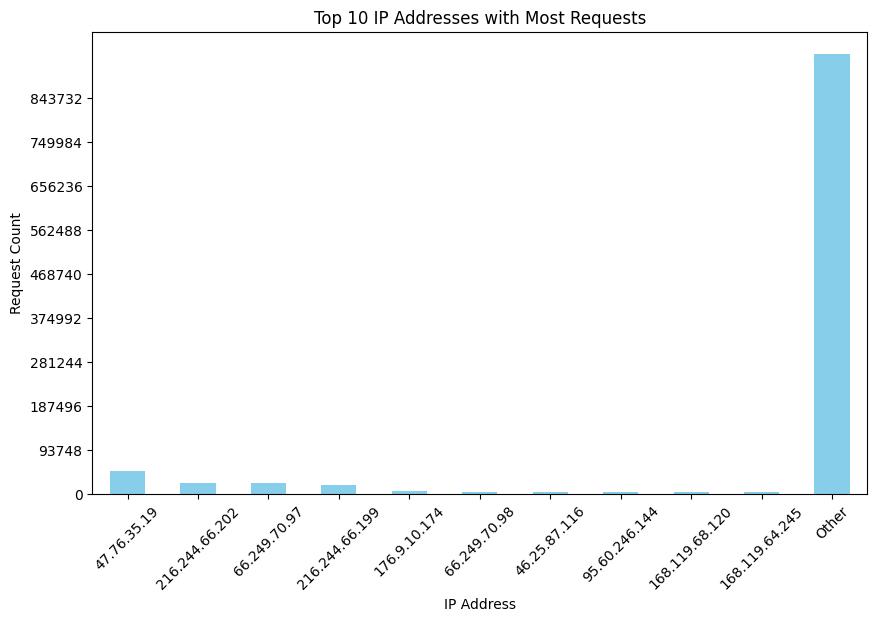

In [17]:
# Set the number of top entities to display
top_n = 10

# IP Address Distribution
plt.figure(figsize=(10, 6))
ip_counts = df['remote_host'].value_counts()
ip_counts_top = ip_counts.head(top_n)
ip_counts_other = pd.Series(ip_counts.iloc[top_n:].sum(), index=['Other'])
ip_counts_combined = pd.concat([ip_counts_top, ip_counts_other])
ip_counts_combined.plot(kind='bar', color='skyblue')
plt.title(f'Top {top_n} IP Addresses with Most Requests')
plt.xlabel('IP Address')
plt.ylabel('Request Count')
plt.xticks(rotation=45)
# Set y-axis ticks with more intermediate numbers
plt.yticks(np.arange(0, ip_counts_combined.max() + 1, (ip_counts_combined.max() + 1) // 10))
plt.show()




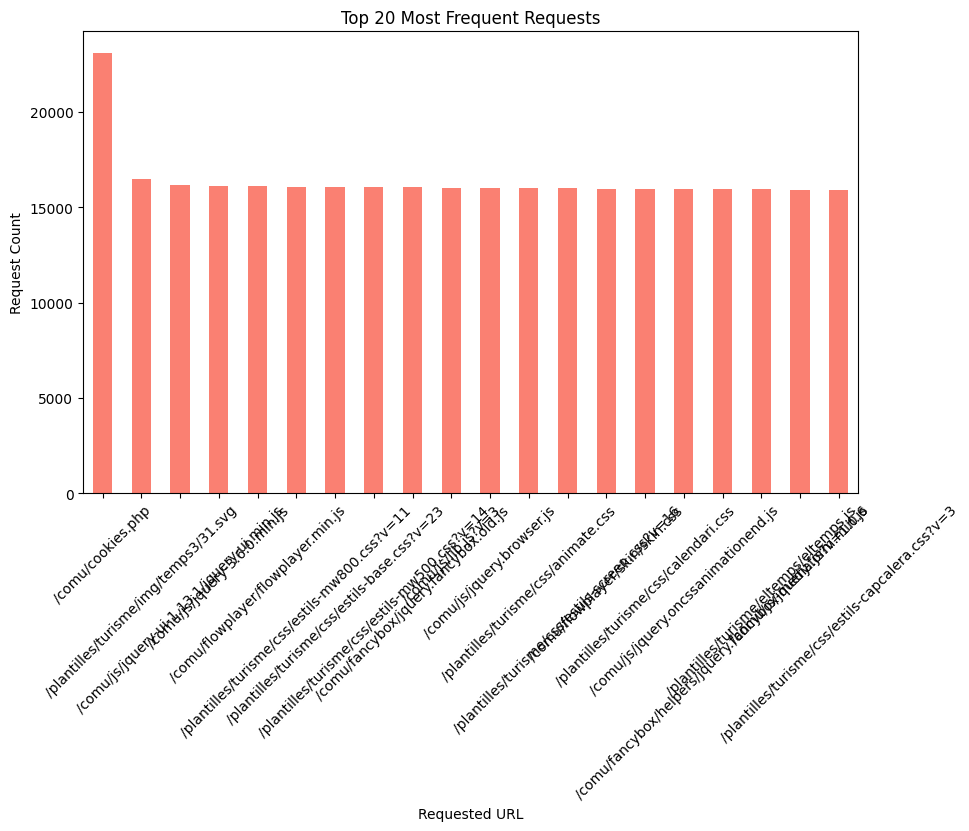

In [18]:
# Most Frequent Requests
plt.figure(figsize=(10, 6))
df['requested_url'].value_counts().head(20).plot(kind='bar', color='salmon')
plt.title('Top 20 Most Frequent Requests')
plt.xlabel('Requested URL')
plt.ylabel('Request Count')
plt.xticks(rotation=45)
plt.show()


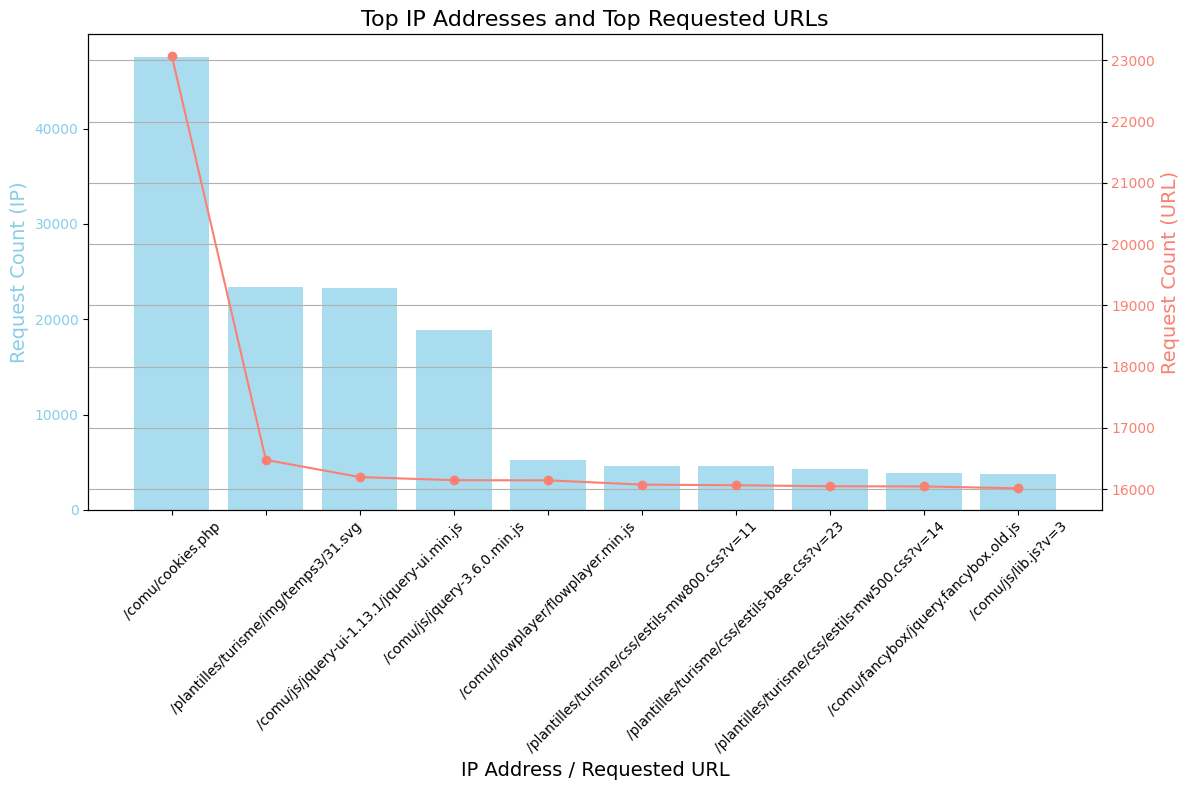

In [19]:
# Set the number of top entities to display
top_n = 10

# Get top IP addresses and their counts
ip_counts = df['remote_host'].value_counts()
top_ip = ip_counts.head(top_n)

# Get top requested URLs and their counts
url_counts = df['requested_url'].value_counts()
top_urls = url_counts.head(top_n)

# Create a figure and axis objects
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot top IP addresses
color = 'skyblue'
ax1.bar(top_ip.index, top_ip, color=color, alpha=0.7)
ax1.set_xlabel('IP Address / Requested URL', fontsize=14)
ax1.set_ylabel('Request Count (IP)', color=color, fontsize=14)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=45)

# Create a second y-axis for top URLs
ax2 = ax1.twinx()
color = 'salmon'
ax2.plot(top_urls.index, top_urls, color=color, marker='o', linestyle='-')
ax2.set_ylabel('Request Count (URL)', color=color, fontsize=14)
ax2.tick_params(axis='y', labelcolor=color)

# Title and grid
plt.title('Top IP Addresses and Top Requested URLs', fontsize=16)
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


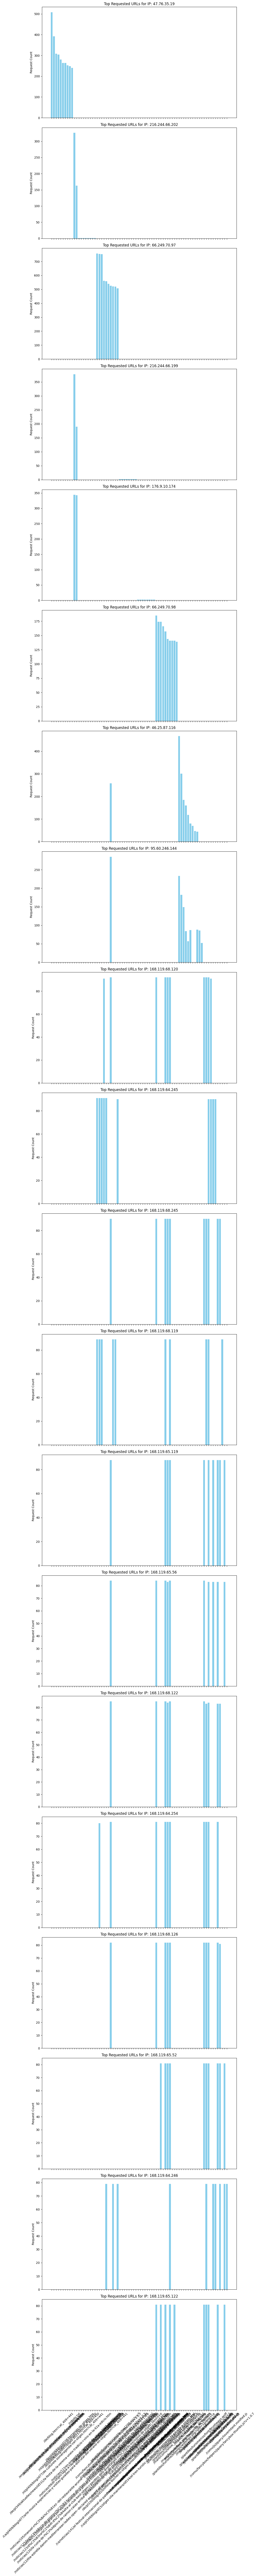

In [20]:
import matplotlib.pyplot as plt

# Set the number of top entities to display
top_n = 20

# Get top IP addresses and their counts
ip_counts = df['remote_host'].value_counts()
top_ips = ip_counts.head(top_n).index

# Create subplots
fig, axs = plt.subplots(nrows=top_n, figsize=(12, 6*top_n), sharex=True)

# Iterate over top IPs and plot top requested URLs for each
for i, ip in enumerate(top_ips):
    top_urls_ip = df[df['remote_host'] == ip]['requested_url'].value_counts().head(10)
    axs[i].bar(top_urls_ip.index, top_urls_ip, color='skyblue')
    axs[i].set_title(f'Top Requested URLs for IP: {ip}')
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].set_ylabel('Request Count')

plt.tight_layout()
plt.show()


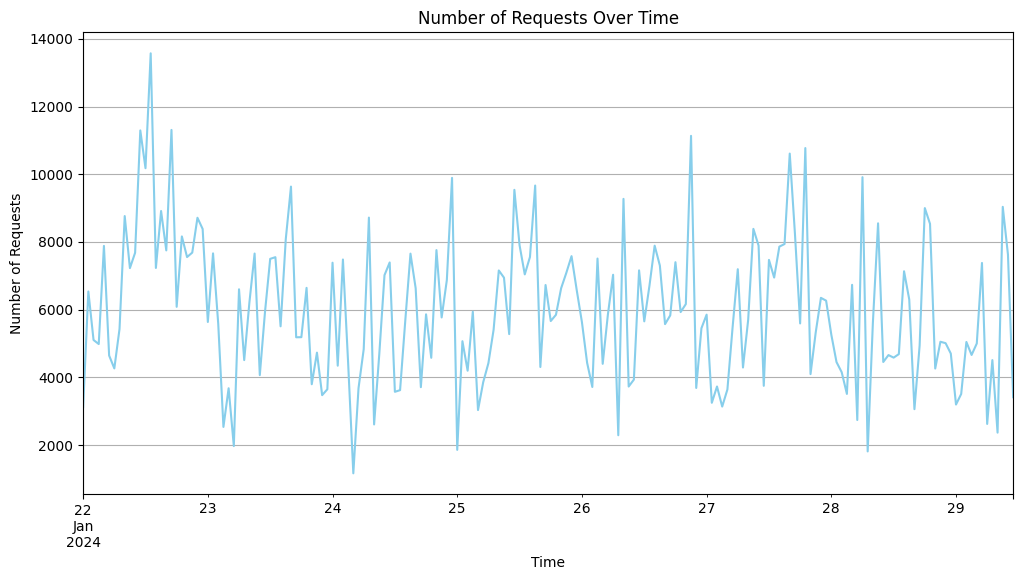

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

# Time Series Analysis
# Convert timestamp column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%d/%b/%Y:%H:%M:%S %z')
# Resample data by hour and count requests
ts_data = df.set_index('timestamp').resample('H').size()

plt.figure(figsize=(12, 6))
ts_data.plot(color='skyblue')
plt.title('Number of Requests Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Requests')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df contains your DataFrame

# Convert categorical variables to one-hot encoded columns
df_encoded = pd.get_dummies(df)

# Create the correlation matrix
corr_matrix = df_encoded.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


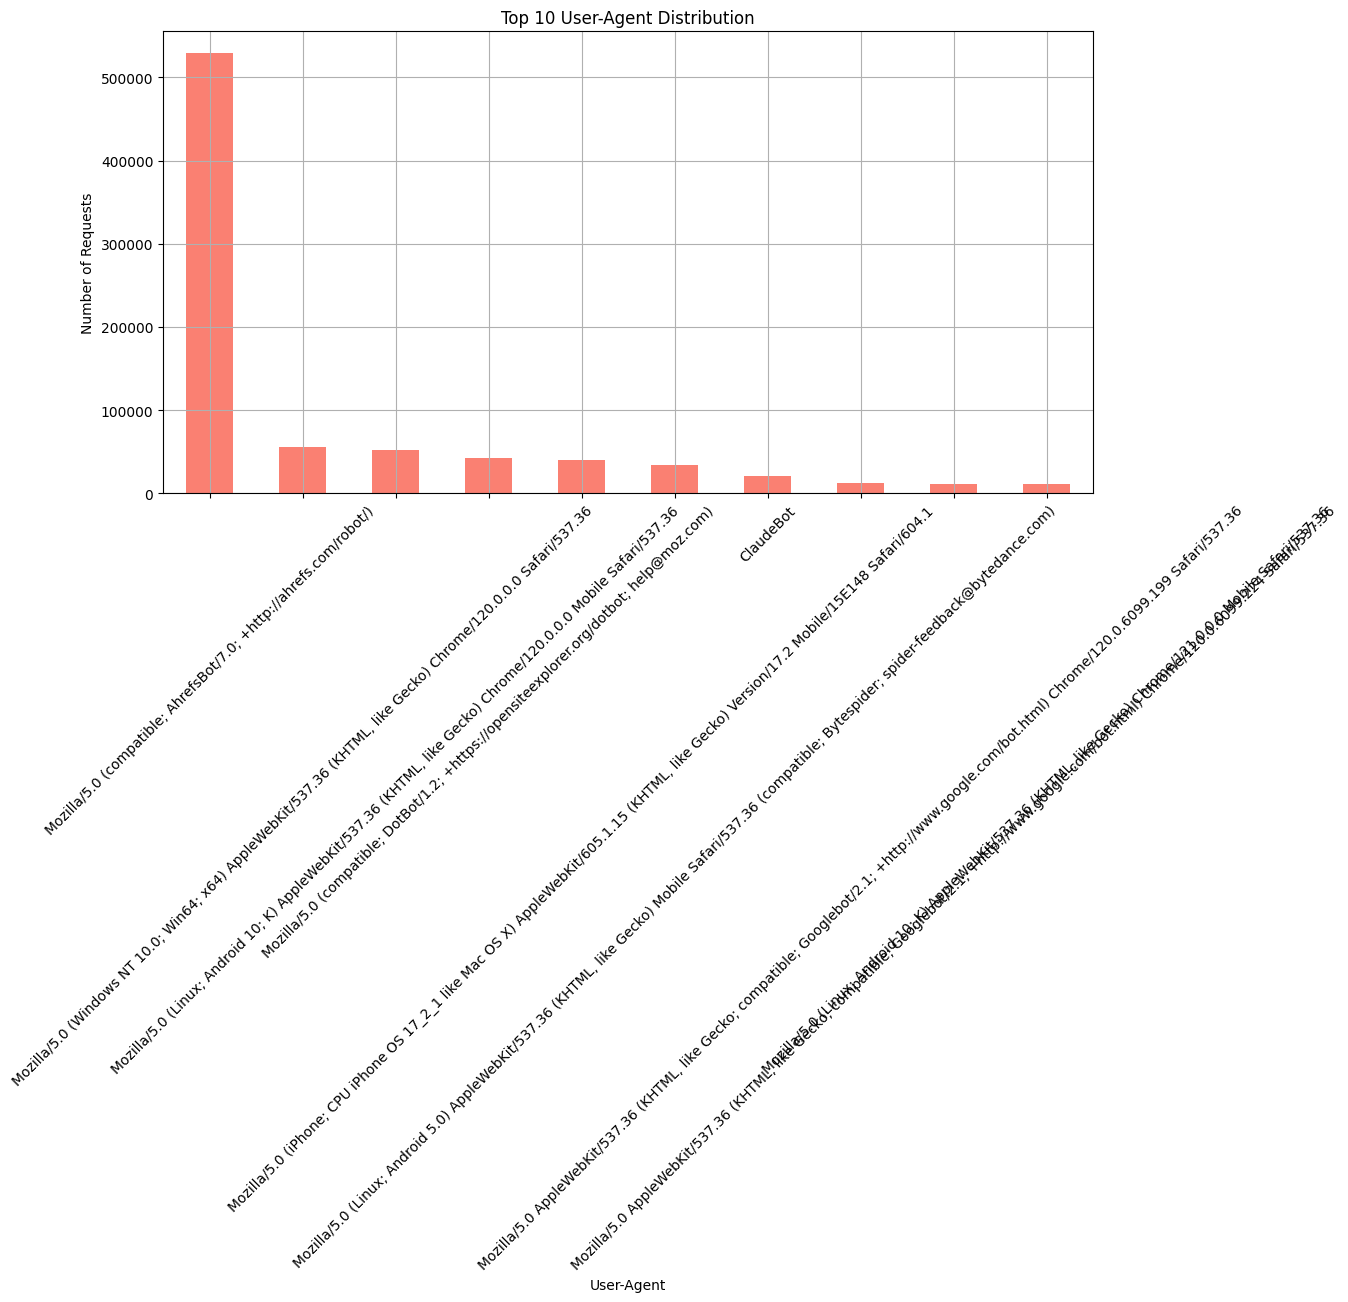

In [23]:
# User-Agent Distribution
plt.figure(figsize=(12, 6))
top_user_agents = df['user_agent'].value_counts().head(10)
top_user_agents.plot(kind='bar', color='salmon')
plt.title('Top 10 User-Agent Distribution')
plt.xlabel('User-Agent')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()